# ECE 351 - Lab #11
## Z-Transform Operations
### Introduction
The purpose of this lab is to analyze a discrete system by two different methods in Python.

#### Task 1

$$y[k] = 2x[k] - 40x[k-1]+10y[k-1]-16y[k-2]$$
$$Y(z)=2X(z)-40z^{-1}X(z)+10z^{-1}Y(z)-16z^{-2}Y(z)$$
$$Y(z)(1+16z^{-2}-10z^{-1})=X(z)(2-40z^{-1})$$

$$H(z)=\frac{2-40z^{-1}}{1-10z^{-1}+16z^{-2}}$$

#### Task 2

$$H(z)=\frac{2-40z^{-1}}{(1-\frac{8}{z})(1-\frac{2}{z})}=\frac{A}{1-\frac{8}{z}}+\frac{B}{1-\frac{2}{z}}$$

Solving for A, B...

$$H(z)=\frac{-4}{1-\frac{8}{z}}+\frac{6}{1-\frac{2}{z}}$$

#### Task 3

In [1]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
colors = ["red", "blue", "green", "gray", "purple", "orange"]
# Generic Function to create a plot
def create_plot(x, y, xLabel=["X-Values"], yLabel=["Y-Values"],
                title=["Plot"], num_rows=1, size=(16, 12), mode="Norm"):
    plt.figure(figsize=size, dpi=300)
    for c, (x_vals, y_vals, x_labels, y_labels, titles) in enumerate(
        zip(x, y, xLabel, yLabel, title)):
        for c2, (y_v, t) in enumerate(zip(y_vals, titles)):
            plt.subplot(num_rows, 1, c + 1)
            # Add a plot to the subplot, use transparency so they can both be seen
            if mode is "Norm":
                plt.plot(x_vals, y_v, label=t, color=colors[c2+c], alpha=0.70)
            else:
                plt.semilogx(x_vals, y_v, label=t, color=colors[c2+c], alpha=0.70)
            plt.ylabel(y_labels)
            plt.xlabel(x_labels)
            plt.grid(True)
            plt.legend(loc='lower right')
    
    plt.show()
num, den = [2, -40], [1, -10, 16]

In [2]:
r, p, k = signal.residuez(num, den)
print ("The roots of the PFD: ", r, "\nThe Poles: ", p, "\nThe residual: ", k)

The roots of the PFD:  [ 6. -4.] 
The Poles:  [2. 8.] 
The residual:  [0.]


#### Task 4

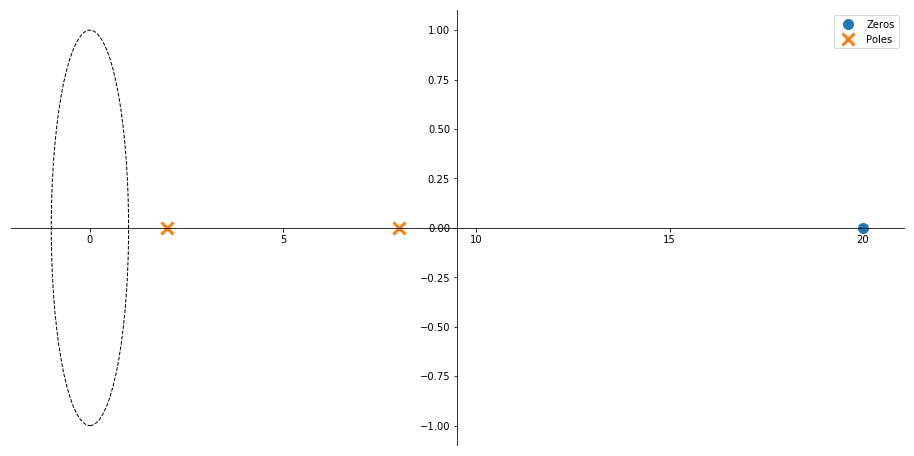

In [3]:
plt.rcParams["figure.figsize"] = (16, 8)
def zplane(b, a):
    ax = plt.subplot(111) # One row, one column, position 1
    
    # Create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)
    
    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = np.array(b) / float(kn)
    else:
        kn = 1
        
    if np.max(a) > 1:
        kd = np.max(a)
        a = np.array(a) / float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties
    t1 = plt.plot(z.real, z.imag, 'o', ms=10, label='Zeros')
    plt.setp(t1, markersize=10.0, markeredgewidth=1.0)
    
    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'x', ms=10, label='Poles')
    plt.setp(t2, markersize=12.0, markeredgewidth=3.0)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.legend()
    # set the ticks
    # r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    # ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)
    plt.show()
    
    return z, p, k

_ = zplane(num, den)

#### Task 5

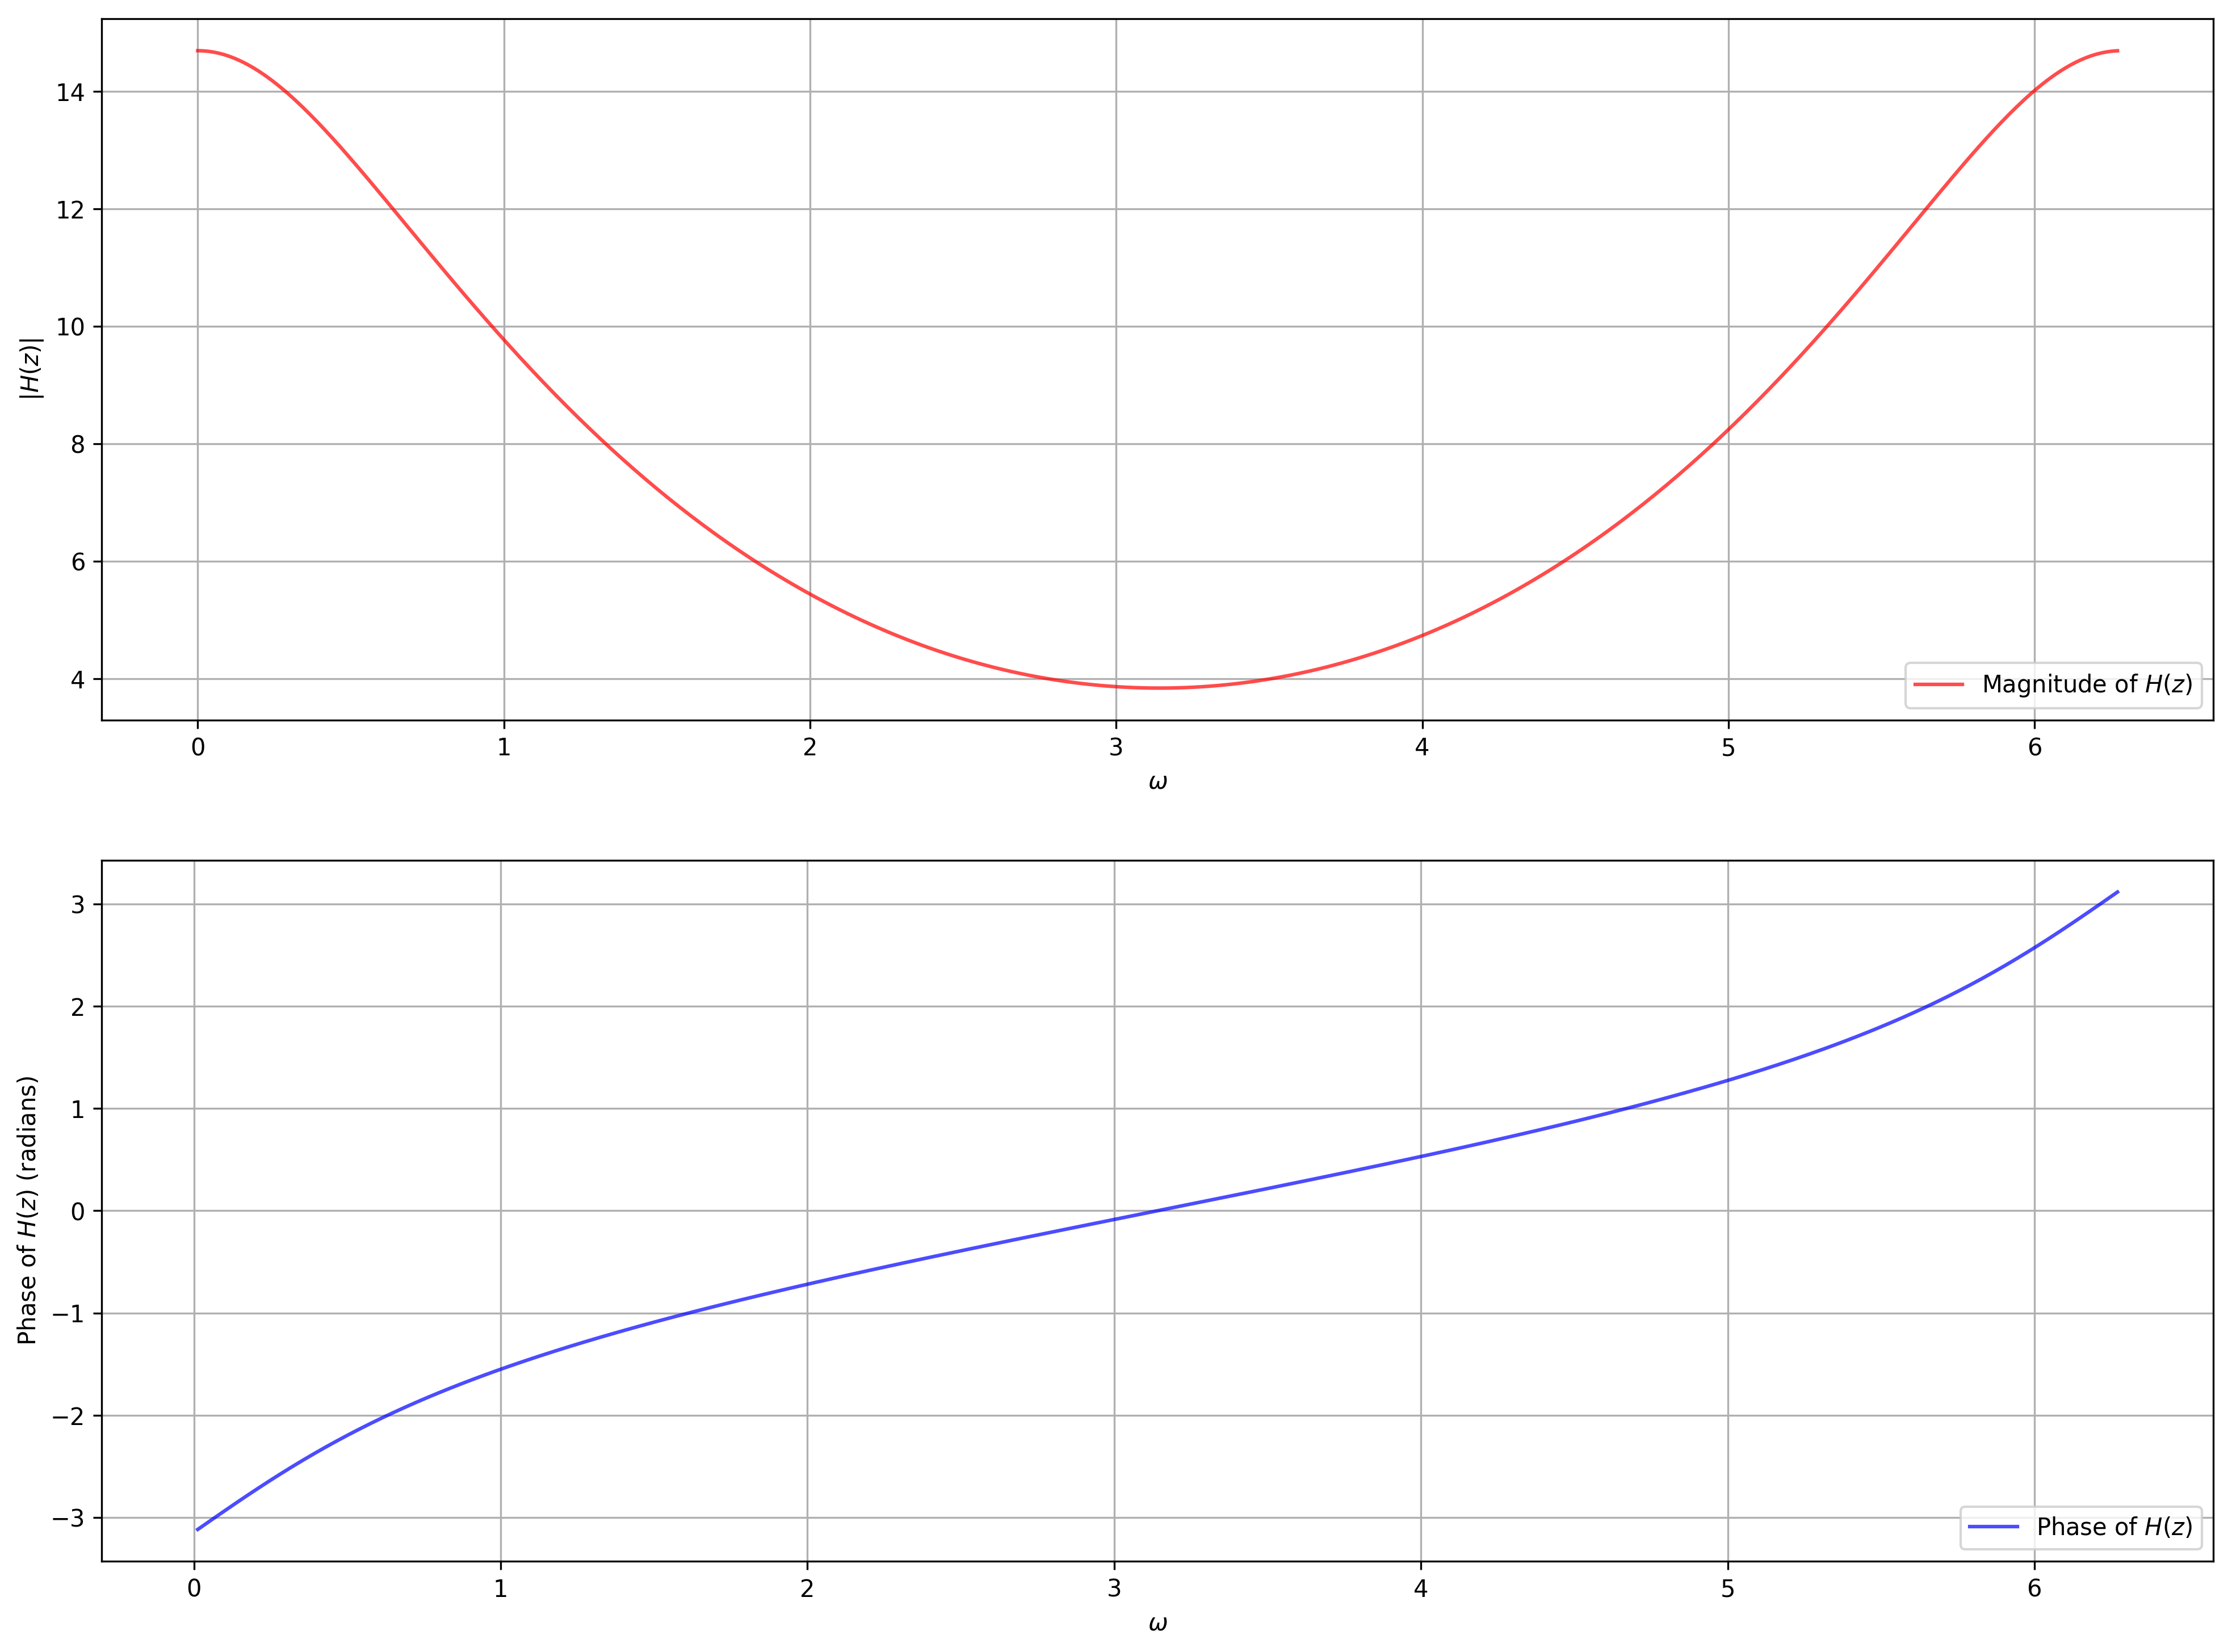

In [4]:
w, h = signal.freqz(num, den, whole=True)
create_plot([w, w[1:]],
            [(20 * np.log10(abs(h)), ), (np.angle(h)[1:], )],
            ["$\omega$", "$\omega$"],
            ["$|H(z)|$", "Phase of $H(z)$ (radians)"],
            [("Magnitude of $H(z)$", ), ("Phase of $H(z)$", )], 2)

### Questions
1. The plot in Task 4 of $|H(z)|$ for this system shows that the system is _not_ stable. This is because the magnitude of the poles are not all less than 1. This is especially clear on the graph, because the unit circle, which encompasses all points with magnitudes equal to or less than 1, contains neither of the poles for this system.
2. I have no suggestions for feedback on this lab. All the instructions were very clear, and the results are inherently easy to understand. My only critique would be that I had to teach my self the Z-Transform, as the lab is covering material we've yet to cover in the class. But, that is clearly at no fault to the lab's design.

### Conclusion
This lab is a very effective introduction into the basics of performing Z-transformations on discrete systems. In particular, I find the `zplane()` function a really useful visual aid for analyzing the poles and zeros of a system.